In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [2]:
df_old = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df = df_old.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

# Independent t-test 

## 'Sex' vs 'qchat_score'

Null Hypothesis: There is no statisical difference between male and female mean qchat scores.

Alternative Hypothesis: There is a statistical difference between male and female mean qchat scores. 

In [6]:
# SEPARATE GENDER INTO TWO DF'S FOR INDEPENDENT T-TEST
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

In [7]:
female_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
13,14,1,1,1,1,0,0,1,0,1,1,15,7,f,middle eastern,yes,no,family member,Yes
17,18,1,1,1,0,1,1,1,1,0,1,12,8,f,middle eastern,yes,no,family member,Yes
19,20,1,1,1,0,1,0,1,1,0,1,12,7,f,black,no,no,family member,Yes
35,36,1,1,1,1,1,1,1,1,1,1,15,10,f,middle eastern,no,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1029,0,0,1,1,1,1,0,0,1,0,22,5,f,Latino,no,no,family member,Yes
1031,1032,1,1,0,0,0,1,1,1,0,1,36,6,f,Others,no,yes,family member,Yes
1036,1037,1,1,0,1,0,1,1,1,0,0,14,6,f,asian,no,no,family member,Yes
1046,1047,0,1,0,1,1,1,1,1,1,0,24,7,f,middle eastern,no,no,family member,Yes


In [8]:
df.groupby('Sex').asd_traits.describe()

,count,unique,top,freq
Sex,,,,
f,194,1,Yes,194
m,534,1,Yes,534


In [9]:
# TWO SAMPLE T-TEST OF GENDER AND QCHAT-SCORE
print(stats.ttest_ind(male_df['qchat_score'], female_df['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05')

Ttest_indResult(statistic=-0.3602431012464004, pvalue=0.7188758523230369)
WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS MORE THAN 0.05


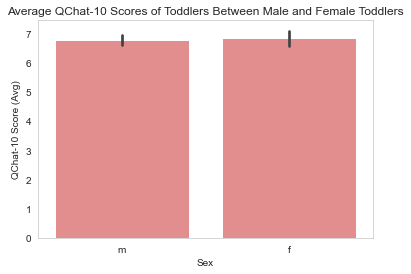

In [10]:
sns.set_style("whitegrid",{'axes.grid' : False})
  
ax = sns.barplot(x = 'Sex', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers Between Male and Female Toddlers')
ax.set_xlabel('Sex')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('sex_qchat_score.png')
plt.show();

## 'family_asd' vs 'qchat_score'

Null Hypothesis: There is not a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.

Alternative Hypothesis: There is a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.

In [11]:
# SEPARATE FAMILY WITH ASD INTO TWO DF'S FOR INDEPENDENT T-TEST
y_family = df.loc[(df['family_asd'] == 'yes')]
n_family = df.loc[(df['family_asd']== 'no')]

In [12]:
# TWO SAMPLE T-TEST OF FAMILY AND QCHAT-SCORE
print(stats.ttest_ind(y_family['qchat_score'], n_family['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05')

Ttest_indResult(statistic=1.4272440393589116, pvalue=0.1554187508493741)
WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05


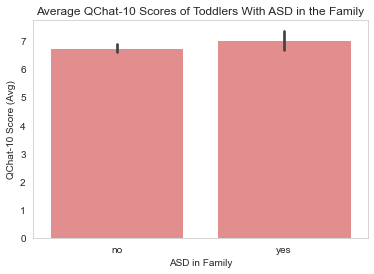

In [13]:
sns.set_style("whitegrid",{'axes.grid' : False})
  
ax = sns.barplot(x = 'family_asd', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers With ASD in the Family')
ax.set_xlabel('ASD in Family')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('familyASD_qchat_score.png')
plt.show();

## 'Jaundice' vs 'qchat_score'

 Null Hypothesis: The average QChat-10 scores between individuals who have jaundice and those who do not are the same.

Alternative Hypothesis: The average QChat-10 scores between individuals who have jaundice and those who do not are not the same.

In [14]:
# SEPARATE JAUNDICE INTO TWO DF'S FOR INDEPENDENT T-TEST
y_jaundice = df.loc[(df['Jaundice'] == 'yes')]
n_jaundice = df.loc[(df['Jaundice']== 'no')]

In [15]:
# INDEPENDENT SAMPLE T-TEST OF FAMILY AND QCHAT-SCORE
print(stats.ttest_ind(y_jaundice['qchat_score'], n_jaundice['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS MORE THAN 0.05')

Ttest_indResult(statistic=-1.6824077449272743, pvalue=0.09330055128685265)
WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS MORE THAN 0.05


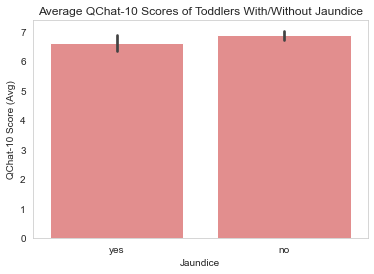

In [16]:
sns.set_style("whitegrid",{'axes.grid' : False})
  
ax = sns.barplot(x = 'Jaundice', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers With/Without Jaundice')
ax.set_xlabel('Jaundice')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('Jaundice_Age.png')
plt.show();

In [17]:
df.groupby('Jaundice').qchat_score.describe()

,count,mean,std,min,25%,50%,75%,max
Jaundice,,,,,,,,
no,513.0,6.867446,1.892102,4.0,5.0,7.0,8.0,10.0
yes,215.0,6.600000,1.983106,4.0,5.0,7.0,8.0,10.0


# One-Way ANOVA

## 'Ethnicity' vs 'Age'

Null Hypothesis: There is no statisticially significant difference of mean qchat scores between groups of ethnicity.

Alternative Hypothesis: There is a statisticially significant difference of mean qchat scores between groups of ethnicity.

In [18]:
# CALCULATE TEST STATISTIC AND PVALUE
print(stats.f_oneway(df['qchat_score'][df['Ethnicity'] == 'White European'],
                df['qchat_score'][df['Ethnicity'] == 'asian'], 
                df['qchat_score'][df['Ethnicity'] == 'middle eastern'],
               df['qchat_score'][df['Ethnicity'] == 'south asian'],
               df['qchat_score'][df['Ethnicity'] == 'black'],
               df['qchat_score'][df['Ethnicity'] == 'Hispanic'],
               df['qchat_score'][df['Ethnicity'] == 'Others'],
               df['qchat_score'][df['Ethnicity'] == 'Latino'],
               df['qchat_score'][df['Ethnicity'] == 'mixed'],
               df['qchat_score'][df['Ethnicity'] == 'Pacifica'],
               df['qchat_score'][df['Ethnicity'] == 'Native Indian']))

print('WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05')

F_onewayResult(statistic=2.7692942391845814, pvalue=0.0023152025613468693)
WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05


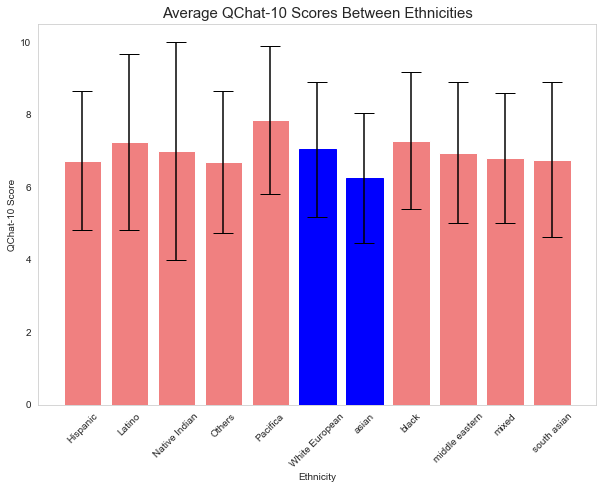

In [19]:
# BAR GRAPH OF ANOVA
mean= df.groupby('Ethnicity').qchat_score.mean()
error= df.groupby('Ethnicity').qchat_score.std()
x=mean.index

fig,ax=plt.subplots(figsize=(10,7))
barlist =plt.bar(x,mean,yerr=error,color='lightcoral',capsize=10)
barlist[6].set_color('b')
barlist[5].set_color('b')
plt.title('Average QChat-10 Scores Between Ethnicities',fontsize=15)
plt.xlabel('Ethnicity')
plt.ylabel('QChat-10 Score')
plt.xticks(x, rotation=45)
plt.savefig('one_way_anova.png')
plt.show();

In [20]:
# POST HOC TEST TO SEE WHERE THE DIFFERENCES LIE
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['qchat_score'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)
print('POST HOC TESTS SHOW THAT THE MEAN DIFFERENCES OF AGE BETWEEN ASIAN AND WHITE EUROPEAN GROUPS ARE SIGNIFICANTLY DIFFERENT')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.5167    0.9 -1.2535  2.2869  False
      Hispanic  Native Indian   0.2667    0.9 -3.4465  3.9799  False
      Hispanic         Others  -0.0437    0.9 -1.6406  1.5532  False
      Hispanic       Pacifica   1.1238    0.9 -1.4502  3.6978  False
      Hispanic White European   0.3147    0.9 -0.8702  1.4995  False
      Hispanic          asian  -0.4692    0.9 -1.6653   0.727  False
      Hispanic          black   0.5487    0.9 -0.9404  2.0379  False
      Hispanic middle eastern   0.2146    0.9  -1.068  1.4972  False
      Hispanic          mixed   0.0667    0.9 -2.8954  3.0288  False
      Hispanic    south asian   0.0234    0.9 -1.4831    1.53  False
        Latino  Native Indian    -0.25    0.9 -4.0466  3.5466  False
        Latino         Others  -0.

In [21]:
df.groupby('Ethnicity').qchat_score.describe()

,count,mean,std,min,25%,50%,75%,max
Ethnicity,,,,,,,,
Hispanic,30.0,6.733333,1.910648,4.0,5.0,6.5,8.75,10.0
Latino,20.0,7.250000,2.425197,4.0,5.0,8.5,9.00,10.0
Native Indian,3.0,7.000000,3.000000,4.0,5.5,7.0,8.50,10.0
Others,29.0,6.689655,1.965841,4.0,5.0,6.0,8.00,10.0
Pacifica,7.0,7.857143,2.035401,4.0,7.5,8.0,9.00,10.0
White European,250.0,7.048000,1.864296,4.0,5.0,7.0,9.00,10.0
asian,212.0,6.264151,1.794155,4.0,5.0,6.0,8.00,10.0
black,39.0,7.282051,1.891097,4.0,5.5,8.0,9.00,10.0
middle eastern,96.0,6.947917,1.943246,4.0,5.0,7.0,8.25,10.0


# Two-Way ANOVA

In [22]:
# CREATE NEW DATAFRAME WITH ONLY COLUMNS FOR ANOVA CALLED DF_ANOVA
df_anova= df.drop(columns=['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
      'family_asd','Age', 'Sex','Who completed the test', 'asd_traits'])

In [23]:
df_anova.groupby('Jaundice').qchat_score.describe()

,count,mean,std,min,25%,50%,75%,max
Jaundice,,,,,,,,
no,513.0,6.867446,1.892102,4.0,5.0,7.0,8.0,10.0
yes,215.0,6.600000,1.983106,4.0,5.0,7.0,8.0,10.0


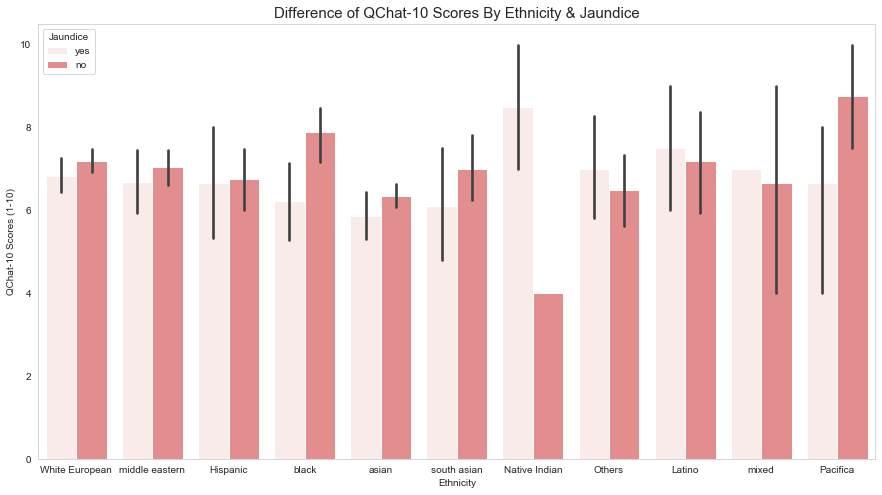

In [24]:
# BAR PLOT TO SHOW DISTRIBUTION
fig,ax=plt.subplots(figsize=(15,8))
ax= sns.barplot(x="Ethnicity",y='qchat_score',hue='Jaundice',data=df_anova, color='lightcoral')
ax.set_title('Difference of QChat-10 Scores By Ethnicity & Jaundice',fontsize=15)
ax.set_xlabel('Ethnicity')
ax.set_ylabel('QChat-10 Scores (1-10)')
plt.savefig('Two_Way_Anova.png')
plt.show();

In [25]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes


In [26]:
# TWO WAY ANOVA OLS MODEL
from statsmodels.formula.api import ols
import statsmodels.api as sm


model = ols('qchat_score ~ C(Ethnicity)+ C(Jaundice) + C(Ethnicity):C(Jaundice)',data=df_anova).fit()
anova_table = sm.stats.anova_lm(model,type=2)
print(anova_table)

print('There was no significant interaction between Jaundice and no main effect of family history of ASD on Age. Simple main effects analysis showed that males had significantly higher age compared to females.')

                             df       sum_sq    mean_sq         F    PR(>F)
C(Ethnicity)               10.0    99.862994   9.986299  2.804178  0.002050
C(Jaundice)                 1.0    25.611517  25.611517  7.191778  0.007495
C(Ethnicity):C(Jaundice)   10.0    45.725823   4.572582  1.283992  0.235276
Residual                  706.0  2514.222744   3.561222       NaN       NaN
There was no significant interaction between Jaundice and no main effect of family history of ASD on Age. Simple main effects analysis showed that males had significantly higher age compared to females.


In [27]:
# POST HOC TEST TO SEE WHERE THE DIFFERENCES LIE
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df_anova['qchat_score'],df_anova['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)
print('POST HOC TESTS SHOW THAT THE MEAN DIFFERENCES OF QCHAT-10 SCORES BETWEEN ASIAN AND WHITE EUROPEANS ARE SIGNIFICANTLY DIFFERENT')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.5167    0.9 -1.2535  2.2869  False
      Hispanic  Native Indian   0.2667    0.9 -3.4465  3.9799  False
      Hispanic         Others  -0.0437    0.9 -1.6406  1.5532  False
      Hispanic       Pacifica   1.1238    0.9 -1.4502  3.6978  False
      Hispanic White European   0.3147    0.9 -0.8702  1.4995  False
      Hispanic          asian  -0.4692    0.9 -1.6653   0.727  False
      Hispanic          black   0.5487    0.9 -0.9404  2.0379  False
      Hispanic middle eastern   0.2146    0.9  -1.068  1.4972  False
      Hispanic          mixed   0.0667    0.9 -2.8954  3.0288  False
      Hispanic    south asian   0.0234    0.9 -1.4831    1.53  False
        Latino  Native Indian    -0.25    0.9 -4.0466  3.5466  False
        Latino         Others  -0.

# CHI Square Test

Null Hypothesis: There is no relationship between Sex and Ethnicity of those individuals with ASD traits.

Alternative: There is a relationship between Sex and Ethnicity of those individuals with ASD traits.

In [28]:
# CREATE NEW DATAFRAME FOR CHI-SQUARE TEST AND INPUT 0 FOR NAN VALUE IN NATIVE INDIAN
df_both = df.groupby('Sex').Ethnicity.value_counts()
df_new = df_both.unstack()
values = {'Native Indian': 0}
df_new.fillna(value=values,inplace=True)

In [29]:
df_new.head()

Ethnicity,Hispanic,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
Sex,,,,,,,,,,,
f,6.0,7.0,0.0,9.0,3.0,65.0,52.0,5.0,32.0,3.0,12.0
m,24.0,13.0,3.0,20.0,4.0,185.0,160.0,34.0,64.0,2.0,25.0


In [30]:
# CHI SQUARE TEST
stat, p, dof, expected = chi2_contingency(df_both)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[ 65.  52.  32.  12.   9.   7.   6.   5.   3.   3. 185. 160.  64.  34.
  25.  24.  20.  13.   4.   3.   2.]
probability=0.950, critical=nan, stat=0.000)
Independent (fail to reject H0)
signigicance=0.050, p=1.000,
Independent (fail to reject)
